In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

In [ ]:
# Simulate 1 day at the store
def day_simulation(ajijo_data, n_customers, inventory_status='standard'):
    
    # Inventory status params ---> 'standard', 'full'
    
    # Create store
    store = ajijo_data.sample(np.int(0.75 * len(ajijo_data))).reset_index(drop=True)

    store['price'] = store['price'].str.replace("$", "").astype(float)
    store.loc[store.inventory == -199, 'inventory'] = 0
    store.loc[store.inventory == -99, 'inventory'] = np.random.randint(1,25, (store.inventory == -99).sum())
    
    if inventory_status == 'full':
        store.loc[:,'inventory'] = store.loc[:,'inventory'].apply(lambda x : (x +2) * 5)

    # Simulation Logs
    revenue = 0 # From sales
    revenue_lost = 0 # Due to missing stock

    # Simulate n customers (for 1 day)
    customers = [np.random.randint(0, len(store), np.random.randint(1, 15)) for i in range(n_customers)]

    for customer in customers:
        # Purchased items (increase revenue and reduce stock)
        revenue_lost -= store.loc[customer, 'price'][store.inventory <= 0].sum() # Calculate revenue lost due to low stock
        revenue += store.loc[customer, 'price'][store.inventory > 0].sum() # Calculate revenue from sales
        store.loc[customer, 'inventory'] = store.loc[customer]['inventory'].apply(lambda x : x - 1) # Update the inventory
    
    # Calculate percentage of potential revenue lost due to unavailability of products
    pl_inventory_perc = revenue_lost / revenue * 100 if revenue > 0 else 0
    pl_inventory_perc = np.round(pl_inventory_perc, 2)
    
    # Revenue if the items had been available
    potential_revenue = np.round(revenue - revenue_lost, 2)
    
    # Actual Revenue
    revenue = np.round(revenue, 2)
    
    return revenue, potential_revenue, pl_inventory_perc

# Simulate store activity for 'num_runs' number of days
def store_simulation(data, max_customers_per_day, num_runs):

    customer_activity = np.random.randint(0, max_customers_per_day, num_runs)

    simulation_results = pd.DataFrame()

    for i, n in enumerate(customer_activity):

        clear_output(wait=True)
        revenue, potential_revenue, pl_inventory_perc = day_simulation(data, n)

        print("Simulation Progress : {} %".format(np.round((i+1)/len(customer_activity) * 100,2)))

        day_results = pd.DataFrame({'revenue':revenue,
                                    'potential_revenue':potential_revenue,
                                    'pl_inventory_percentage':pl_inventory_perc}, index=[i])

        simulation_results = pd.concat((simulation_results, day_results))
    
    return simulation_results

In [382]:
data = pd.read_csv("data.csv")
data.sample(5)

,name,inventory,price,price_correspondance,collection,item_url
449,PARVAL KATOOMBA 312G,-99,$1.99,'/products/parval-katoomba-312g',frozen-vegetables,https://www.ajijo.com.au/collections/frozen-ve...
739,RASAM POWDER NIRAPARA 200G,-99,$3.50,'/products/rasam-powder-nirapara-200g',nirapara,https://www.ajijo.com.au/collections/nirapara/...
710,BUNDABERG CREAM SODA 375ML,-199,$2.99,'/products/bundaberg-cream-soda-375ml',mixers,https://www.ajijo.com.au/collections/mixers/pr...
65,MUNG DAL PARSRAM 1 KG,6,$4.50,'/products/mung-dal-parsram-1-kg',beans-lentils,https://www.ajijo.com.au/collections/beans-len...
321,CHICKEN WITH LIVER CAT FOOD B&G 400G,-99,$1.75,'/products/chicken-with-liver-cat-food-b-g-400g',dog-foods,https://www.ajijo.com.au/collections/dog-foods...


In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  1096 non-null   object
 1   inventory             1096 non-null   int64 
 2   price                 1096 non-null   object
 3   price_correspondance  1096 non-null   object
 4   collection            1096 non-null   object
 5   item_url              1096 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.5+ KB


In [36]:
data.inventory.value_counts()

-99     362
-199    293
 10      66
 8       57
 6       42
 9       39
 5       38
 7       31
 15      27
 4       25
 12      21
 11      18
 3       18
 20      14
 2       14
 1       11
 14       5
 16       4
 13       3
 17       3
 18       2
 22       2
 21       1
Name: inventory, dtype: int64

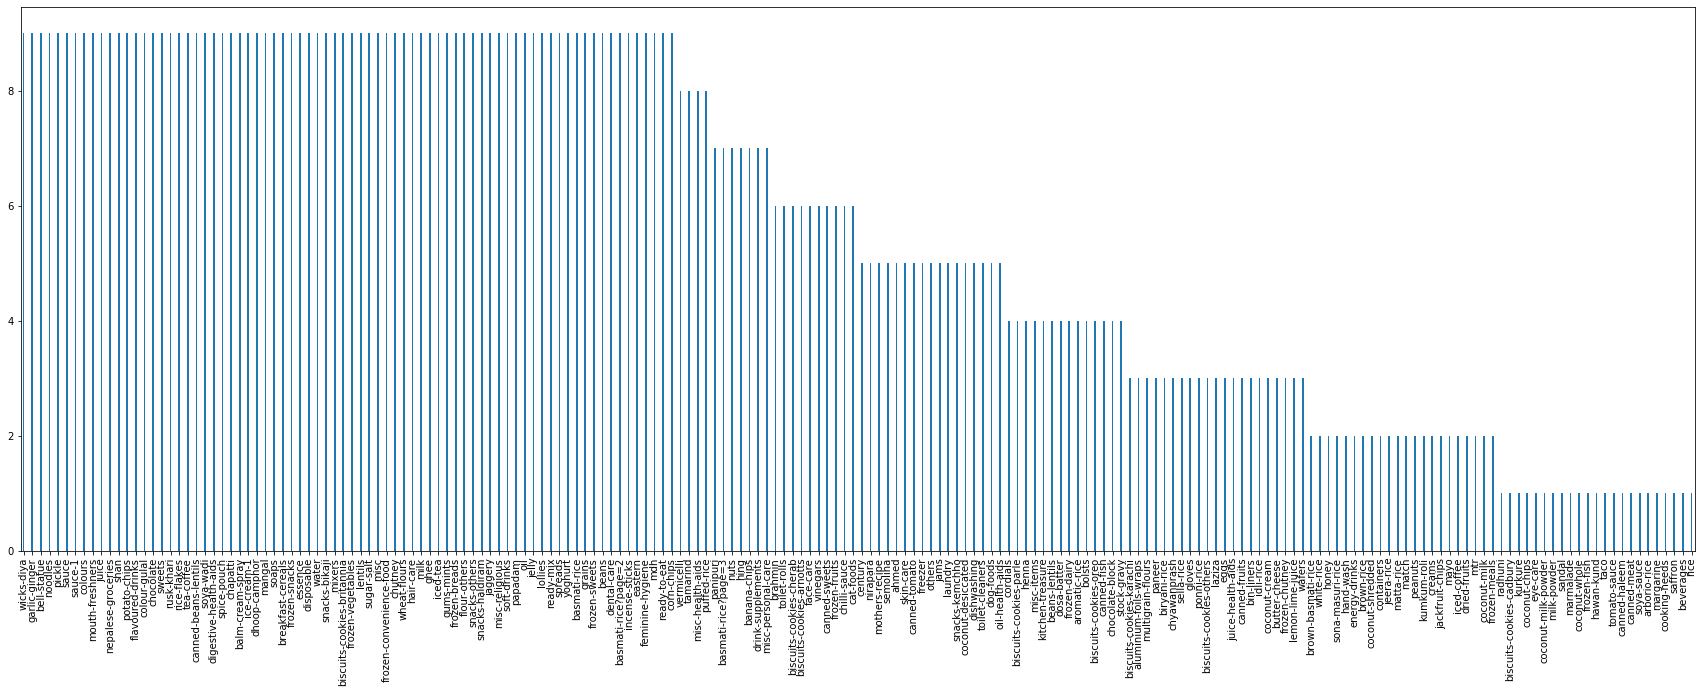

In [17]:
plt.figure(figsize=(30,10))
data.collection.value_counts().plot(kind='bar', width=0.2)
plt.show()

In [18]:
from IPython.display import clear_output

In [34]:
for i in range(200):
    clear_output(wait=True)
    
    x = [x for x in range(2000000)]
    
    print("Current Progress : {} %".format(int((np.round(i/200, 2))*100)))

Current Progress : 100 %


In [38]:
data

,name,inventory,price,price_correspondance,collection,item_url
0,"HALEEM MIX, AHMED",-99,$4.75,'/products/haleem-mix-ahmed',ahmed,https://www.ajijo.com.au/collections/ahmed/pro...
1,"FRUIT CHAT MASALA, AHMED, 50G",8,$1.80,'/products/fruit-chat-masala-ahmed',ahmed,https://www.ajijo.com.au/collections/ahmed/pro...
2,"DAHI BARA MASALA, AHMED, 50G",8,$1.80,'/products/dahi-bara-masala-ahmed',ahmed,https://www.ajijo.com.au/collections/ahmed/pro...
3,"CHICKEN MASALA, AHMED, 50G",1,$1.80,'/products/chicken-masala-ahmed',ahmed,https://www.ajijo.com.au/collections/ahmed/pro...
4,"CHANA MASALA, AHMED, 50G",1,$1.80,'/products/chana-masala-ahmed',ahmed,https://www.ajijo.com.au/collections/ahmed/pro...
...,...,...,...,...,...,...
1091,YOGHURT 1KG SHREE GANESHA,-99,$5.00,'/products/yoghurt-1kg-shree-ganesha',yoghurt,https://www.ajijo.com.au/collections/yoghurt/p...
1092,SHARMA KITCHEN YOGHURT 2KG,-99,$9.30,'/products/sharmas-yoghurt-2kg',yoghurt,https://www.ajijo.com.au/collections/yoghurt/p...
1093,SHARMA KITCHEN YOGHURT 1KG,-99,$6.00,'/products/sharmas-yoghurt-1kg',yoghurt,https://www.ajijo.com.au/collections/yoghurt/p...
1094,NATURAL POT SET YOGHURT FU 200G,-199,$2.30,'/products/natural-pot-set-yoghurt-200g',yoghurt,https://www.ajijo.com.au/collections/yoghurt/p...


In [57]:
np.random.seed(0)
store = data.sample(np.int(0.75 * len(data))).reset_index(drop=True)

store

,name,inventory,price,price_correspondance,collection,item_url
0,PURE SPRING WATER 600ML,-99,$2.00,'/products/pure-spring-water-600ml',water,https://www.ajijo.com.au/collections/water/pro...
1,INSTANT DELIGHT BANANA CHIPS 400G,8,$6.99,'/products/banana-chips-200g-id',banana-chips,https://www.ajijo.com.au/collections/banana-ch...
2,TUTTY FRUITY GREEN 200G LATAS KITCHEN,-99,$2.99,'/products/tutty-fruity-green-200g-latas-kitchen',mouth-freshners,https://www.ajijo.com.au/collections/mouth-fre...
3,"EXTRA WHITE BUBBLEMINT, 14G",9,$1.50,'/products/extra-white-bubblemint-14g',gums-mints,https://www.ajijo.com.au/collections/gums-mint...
4,"GREEN CHILLI SAUCE, MITCHELL'S 800G",6,$4.45,'/products/mitchells-green-chilli-sauce',chilli-sauce,https://www.ajijo.com.au/collections/chilli-sa...
...,...,...,...,...,...,...
817,EGG YELLOW COLOUR MAHARAJA CHOICE 50ML,-99,$2.85,'/products/egg-yellow-colour-maharaja-choice-5...,colours,https://www.ajijo.com.au/collections/colours/p...
818,TAMARIND MAYIL 500G,-99,$4.50,'/products/tamarind-mayil-500g',tamarind,https://www.ajijo.com.au/collections/tamarind/...
819,NATURAL ORCHID DHOOP CONE KALPANA,-99,$1.50,'/products/natural-orchid-dhoop-cone-kalpana',dhoop-camphor,https://www.ajijo.com.au/collections/dhoop-cam...
820,"GINGER PASTE, SHAN, 700G",7,$6.75,'/products/ginger-paste-shan-700g',garlic-ginger,https://www.ajijo.com.au/collections/garlic-gi...


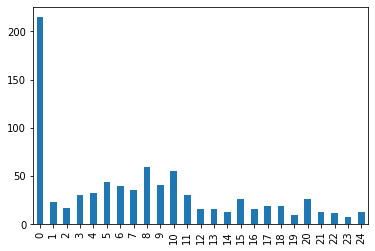

In [103]:
np.random.seed(0)
store = data.sample(np.int(0.75 * len(data))).reset_index(drop=True)

store['price'] = store['price'].str.replace("$", "").astype(float)
store.loc[store.inventory == -199, 'inventory'] = 0
store.loc[store.inventory == -99, 'inventory'] = np.random.randint(1,25, (store.inventory == -99).sum())

store['inventory'].value_counts().sort_index().plot(kind='bar')

In [104]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  822 non-null    object 
 1   inventory             822 non-null    int64  
 2   price                 822 non-null    float64
 3   price_correspondance  822 non-null    object 
 4   collection            822 non-null    object 
 5   item_url              822 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 38.7+ KB


In [161]:
customers = [np.random.randint(0, len(store), np.random.randint(1, 15)) for i in range(10)]

In [217]:
customer = customers[0]

# Purchased items (reduce stock and increase revenue)
store.loc[customer, 'inventory'] = store.loc[customer]['inventory'].apply(lambda x : x - 1)

store.loc[customer,:]

,name,inventory,price,price_correspondance,collection,item_url
318,"POROTTA (MALABAR STYLE), INSTANT DELIGHT, 2KG",0,13.99,'/products/porotta-malabar-style-instant-delig...,frozen-breads,https://www.ajijo.com.au/collections/frozen-br...
293,Haldiram's Bhelpuri 1kg,-8,11.00,'/products/bhelpuri-1kg-haldiram',snacks-haldiram,https://www.ajijo.com.au/collections/snacks-ha...
159,"FRIED NOODLES, INDOMIE, 5 PACKS(85G EA)",1,3.99,'/products/fried-noodles-indomie-5-packs85g-ea',noodles,https://www.ajijo.com.au/collections/noodles/p...
315,"GARLIC GINGER PASTE, AHMED, 700G",-8,7.50,'/products/copy-of-ginger',garlic-ginger,https://www.ajijo.com.au/collections/garlic-gi...
504,MASALA CHILLI PATTU 500G,-3,4.25,'/products/masala-chilli-pattu-500g',chilli-sauce,https://www.ajijo.com.au/collections/chilli-sa...
339,TANG ORANGE 750G,-8,10.95,'/products/tang-orange-200ml',drink-supplements,https://www.ajijo.com.au/collections/drink-sup...
808,"Frooti mango drink, 500ml",7,2.50,'/products/frooti-mango-drink-500ml',flavoured-drinks,https://www.ajijo.com.au/collections/flavoured...
360,"CORNED MUTTON HALAL,SALISBURY, 326G",-3,6.99,'/products/salisbury-corned-mutton-halal-326g',canned-meat,https://www.ajijo.com.au/collections/canned-me...
377,HARPIC 450ML,-3,4.75,'/products/harpic-450ml',toilet-cleaners,https://www.ajijo.com.au/collections/toilet-cl...
601,CLING WRAP 60M B&G,3,3.50,'/products/cling-wrap-60m-b-g',gloves,https://www.ajijo.com.au/collections/gloves/pr...


In [253]:
# Create store
np.random.seed(0)
store = data.sample(np.int(0.75 * len(data))).reset_index(drop=True)

store['price'] = store['price'].str.replace("$", "").astype(float)
store.loc[store.inventory == -199, 'inventory'] = 0
store.loc[store.inventory == -99, 'inventory'] = np.random.randint(1,25, (store.inventory == -99).sum())

In [254]:
# Simulation Logs
revenue = 0 # From sales
revenue_lost = 0 # Due to missing stock

# Simulate n customers (1 day)
n = 10
customers = [np.random.randint(0, len(store), np.random.randint(1, 15)) for i in range(n)]

for customer in customers:
    # Purchased items (increase revenue and reduce stock)
    revenue_lost -= store.loc[customer, 'price'][store.inventory <= 0].sum() # Calculate revenue lost due to low stock
    revenue += store.loc[customer, 'price'][store.inventory > 0].sum() # Calculate revenue from sales
    store.loc[customer, 'inventory'] = store.loc[customer]['inventory'].apply(lambda x : x - 1) # Update the inventory

In [485]:
def day_simulation(ajijo_data, n_customers, inventory_status='standard'):
    
    # Inventory status params ---> 'standard', 'full'
    
    # Create store
    store = ajijo_data.sample(np.int(0.75 * len(ajijo_data))).reset_index(drop=True)

    store['price'] = store['price'].str.replace("$", "").astype(float)
    store.loc[store.inventory == -199, 'inventory'] = 0
    store.loc[store.inventory == -99, 'inventory'] = np.random.randint(1,25, (store.inventory == -99).sum())
    
    if inventory_status == 'full':
        store.loc[:,'inventory'] = store.loc[:,'inventory'].apply(lambda x : (x +2) * 5)

    # Simulation Logs
    revenue = 0 # From sales
    revenue_lost = 0 # Due to missing stock

    # Simulate n customers (for 1 day)
    customers = [np.random.randint(0, len(store), np.random.randint(1, 15)) for i in range(n_customers)]

    for customer in customers:
        # Purchased items (increase revenue and reduce stock)
        revenue_lost -= store.loc[customer, 'price'][store.inventory <= 0].sum() # Calculate revenue lost due to low stock
        revenue += store.loc[customer, 'price'][store.inventory > 0].sum() # Calculate revenue from sales
        store.loc[customer, 'inventory'] = store.loc[customer]['inventory'].apply(lambda x : x - 1) # Update the inventory
    
    # Calculate percentage of potential revenue lost due to unavailability of products
    pl_inventory_perc = revenue_lost / revenue * 100 if revenue > 0 else 0
    pl_inventory_perc = np.round(pl_inventory_perc, 2)
    
    # Revenue if the items had been available
    potential_revenue = np.round(revenue - revenue_lost, 2)
    
    # Actual Revenue
    revenue = np.round(revenue, 2)
    
    return revenue, potential_revenue, pl_inventory_perc

day_simulation(data, 10)

(227.49, 313.36, -37.75)

In [487]:
num_runs = 30000

max_customers_per_day = 30

def store_simulation(data, max_customers_per_day, num_runs):

    customer_activity = np.random.randint(0, max_customers_per_day, num_runs)

    simulation_results = pd.DataFrame()

    for i, n in enumerate(customer_activity):

        clear_output(wait=True)
        revenue, potential_revenue, pl_inventory_perc = day_simulation(data, n)

        print("Simulation Progress : {} %".format(np.round((i+1)/len(customer_activity) * 100,2)))

        day_results = pd.DataFrame({'revenue':revenue,
                                    'potential_revenue':potential_revenue,
                                    'pl_inventory_percentage':pl_inventory_perc}, index=[i])

        simulation_results = pd.concat((simulation_results, day_results))
    
    return simulation_results

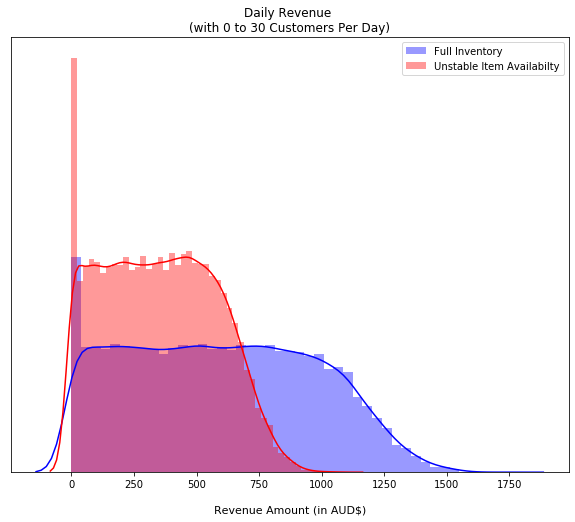

In [3]:
full_inventory = pd.read_csv("30000_runs(with full inventory).csv")
unstable_inventory = pd.read_csv("30000_runs.csv")

plt.figure(figsize=(10,8))
sns.distplot(full_inventory.revenue, color='blue', label='Full Inventory')
sns.distplot(unstable_inventory.revenue, color='red', label='Unstable Item Availabilty')
plt.legend()
plt.yticks([])
plt.title("Daily Revenue \n(with 0 to 30 Customers Per Day)")
plt.xlabel("\nRevenue Amount (in AUD$)", fontsize=11)
plt.savefig("Inventory Opportunity")

plt.show()